Salariul mediu orar al fermierilor din *** este de 13.5 lei. Se stie ca σ=2.9 lei. Calculati si interpretati eroarea standard a mediei pentru un esantion de marime 30.

In [2]:
import math
σ=2.9
n=30
eroarea_standard_mediei = σ / math.sqrt(n)
print(eroarea_standard_mediei)

0.5294651389216606


Presupunem ca avem un esantion care contine randamentul pe ultimele 30 de luni a unei companii X. Media acestor valori este de 2% si abaterea medie patratica a esantionului este de 20%. Calculati si interpretati eroarea standard a mediei esantionului.

Sa presupunem ca avem un esantion de 200 de masuratori, in aceleasi conditii. Care este eroarea standard?

In [4]:
s=20
n=30
eroarea_standard_esantion = s / math.sqrt(n)
print(eroarea_standard_esantion)

3.6514837167011076


In [5]:
s=20
n=200
eroarea_standard_esantion_2 = s / math.sqrt(n)
print(eroarea_standard_esantion_2)

1.414213562373095


O populatie are media 100 si abaterea medie patratica de 50. Se alege un esantion simplu de 100 de elemente.

a) Care e probabilitatea ca media esantionului sa fie la ±5 de media populatiei?  
b) Care e probabilitatea ca media esantionului sa fie la ±10 de media populatiei?  
c) Dar daca esantionul este de 400 de elemente? Care e probabilitatea ca media esantionului sa fie la distanta de ±5 de media populatiei?

a)Care e probabilitatea ca media esantionului sa fie la ±5 de media populatiei? 

In [6]:
from scipy.stats import norm
Z=norm()
media = 100
media_patratica = 50
n = 100
eroarea_standard_mediei_a = media_patratica / math.sqrt(n)
def z(x): 
    return (x-media)/eroarea_standard_mediei_a
probabilitatea = (Z.cdf(z(media+5)) - Z.cdf(z(media-5)))*100
print(probabilitatea)

68.26894921370858


b) Care e probabilitatea ca media esantionului sa fie la ±10 de media populatiei?  

In [9]:
from scipy.stats import norm
Z=norm()
media = 100
media_patratica = 50
n = 100
eroarea_standard_mediei_a = media_patratica / math.sqrt(n)
def z(x): 
    return (x-media)/eroarea_standard_mediei_a
probabilitatea = (Z.cdf(z(media+10)) - Z.cdf(z(media-10)))*100
print(probabilitatea)

95.44997361036415


c) Dar daca esantionul este de 400 de elemente? Care e probabilitatea ca media esantionului sa fie la distanta de ±5 de media populatiei?

In [11]:
from scipy.stats import norm
Z=norm()
media = 100
media_patratica = 50
n = 400
eroarea_standard_mediei_a = media_patratica / math.sqrt(n)
def z(x): 
    return (x-media)/eroarea_standard_mediei_a
probabilitatea = (Z.cdf(z(media+5)) - Z.cdf(z(media-5)))*100
print(probabilitatea)

95.44997361036415


Sa se simuleze teorema limita centrala pornind de la o populatie care urmeaza o distributie:

3. Poisson, cu $\lambda=3$
1. uniforma, cu valori intre 5 si 100

    
Folositi pentru  marimea esantioanelor valorile $n= 10,20,30, 50, 1000$.

Pasi:
    
1. Stabiliti care este media $\mu$ si abaterea medie patratica a populatiei $\sigma$
2. Reprezentati grafic distributia populatiei (pmf) si a unui esantion aleator din populatie;
3. Extrageti esantioane aleatoare (multe!) de marime $n$ din populatie; 
4. Calculati media pentru fiecare esantion
5. Reprezentati distributia mediilor calculate la punctul anterior
6. Calculati media mediilor de la pct. 4. Comparati cu media populatie.
7. Calculati abaterea medie patratica a mediilor de la punctul 4. Comparati cu $\sigma/\sqrt(n)$
8. Reprezentati valoarea mediilor de la punctul 6 ca functie de $n$, $n= 10,20,...,1000$.

1. Stabiliti care este media $\mu$ si abaterea medie patratica a populatiei $\sigma$

In [14]:
import numpy as np
from scipy.stats import poisson, uniform
#1.
media_poisson = 3
sigma_poisson = np.sqrt(media_poisson)

media_uniform = (5 + 100) / 2
sigma_uniform = np.sqrt((100 - 5) ** 2 / 12)

In [15]:
print(media_poisson)
print(sigma_poisson)
print(media_uniform)
print(sigma_uniform)

3
1.7320508075688772
52.5
27.424137786507224


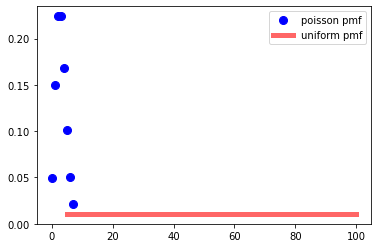

In [16]:
#2
import matplotlib.pyplot as plt

x_poisson = np.arange(poisson.ppf(0.01, media_poisson), poisson.ppf(0.99, media_poisson))
plt.plot(x_poisson, poisson.pmf(x_poisson, media_poisson), 'bo', ms=8, label='poisson pmf')

x_uniform = np.linspace(5, 100, 100)
plt.plot(x_uniform, uniform.pdf(x_uniform, 5, 95), 'r-', lw=5, alpha=0.6, label='uniform pmf')

plt.legend()
plt.show()

In [17]:
#3
poisson_population = poisson(3)
uniform_population = uniform(5, 95)
n_values = [10, 20, 30, 50, 1000]
poisson_samples = {n: poisson_population.rvs(size=(10000, n)) for n in n_values}
uniform_samples = {n: uniform_population.rvs(size=(10000, n)) for n in n_values}

In [18]:
print(poisson_samples)

{10: array([[3, 5, 3, ..., 3, 3, 3],
       [4, 2, 3, ..., 3, 9, 6],
       [4, 3, 3, ..., 2, 3, 6],
       ...,
       [5, 4, 1, ..., 1, 3, 5],
       [4, 5, 3, ..., 2, 4, 5],
       [3, 3, 2, ..., 2, 4, 3]]), 20: array([[3, 3, 0, ..., 3, 6, 2],
       [2, 3, 3, ..., 4, 2, 4],
       [3, 1, 2, ..., 3, 5, 4],
       ...,
       [3, 0, 8, ..., 2, 5, 0],
       [2, 6, 2, ..., 3, 1, 9],
       [1, 2, 4, ..., 4, 2, 3]]), 30: array([[1, 1, 2, ..., 2, 1, 3],
       [6, 3, 1, ..., 3, 4, 3],
       [4, 1, 1, ..., 2, 2, 1],
       ...,
       [2, 2, 5, ..., 4, 2, 4],
       [1, 7, 3, ..., 2, 3, 2],
       [1, 3, 5, ..., 3, 4, 1]]), 50: array([[2, 0, 5, ..., 1, 2, 4],
       [4, 3, 0, ..., 5, 3, 4],
       [4, 3, 6, ..., 2, 3, 4],
       ...,
       [3, 3, 3, ..., 4, 0, 4],
       [4, 2, 1, ..., 1, 5, 2],
       [3, 3, 3, ..., 1, 2, 3]]), 1000: array([[5, 3, 4, ..., 2, 0, 0],
       [7, 3, 0, ..., 1, 4, 2],
       [4, 3, 2, ..., 2, 4, 7],
       ...,
       [3, 3, 5, ..., 3, 0, 1],
       [5, 2,

In [19]:
print(uniform_samples)

{10: array([[38.74179888, 29.17610856, 56.88305473, ..., 57.02166615,
         9.97938132, 76.34744892],
       [15.10552108, 94.51555793, 74.0409699 , ..., 89.41911439,
        54.56793221, 82.4035641 ],
       [21.90987935, 91.70855008, 89.24674982, ..., 16.5311285 ,
        31.66762844,  5.39362132],
       ...,
       [59.95190557, 79.996613  , 67.42956324, ..., 85.72177453,
        47.41976826, 15.12023827],
       [44.90343996, 61.12398092, 59.31623939, ...,  8.4369886 ,
        12.27339757, 15.13093259],
       [63.95933047,  6.6949605 , 21.42465759, ..., 92.61767748,
        18.05885318, 42.80028962]]), 20: array([[72.15111415, 13.67841688, 41.18008967, ..., 10.88637798,
        52.69165792, 33.8844679 ],
       [88.18740299, 64.02243963, 73.68498544, ..., 52.57942056,
        20.46630963, 23.33327527],
       [30.92676485, 47.83673892, 78.42867707, ..., 58.37259662,
        54.1674949 , 30.36394354],
       ...,
       [30.58340653, 75.6000471 , 61.01729826, ..., 23.15135507,


In [20]:
#4
poisson_means = {n: sample.mean(axis=1) for n, sample in poisson_samples.items()}
uniform_means = {n: sample.mean(axis=1) for n, sample in uniform_samples.items()}

In [21]:
print(poisson_means)
print(uniform_means)

{10: array([3.7, 3.5, 2.7, ..., 2.9, 3.2, 3.6]), 20: array([3.15, 3.55, 2.95, ..., 2.8 , 3.5 , 2.85]), 30: array([2.63333333, 4.26666667, 3.03333333, ..., 3.1       , 3.26666667,
       3.1       ]), 50: array([3.12, 2.88, 3.3 , ..., 2.44, 2.54, 3.16]), 1000: array([2.975, 2.985, 2.998, ..., 3.051, 2.96 , 2.94 ])}
{10: array([54.72142835, 58.66453776, 44.43509339, ..., 55.29898059,
       36.51902051, 46.73360928]), 20: array([47.11735709, 48.97775684, 55.72645699, ..., 50.07323998,
       61.65360178, 53.76639508]), 30: array([55.2039743 , 45.64298118, 54.20288861, ..., 40.84873731,
       52.72309442, 54.69045869]), 50: array([50.27070661, 52.14561263, 45.78490637, ..., 51.25406471,
       49.4669502 , 56.75509305]), 1000: array([53.06933944, 52.66353927, 52.46264794, ..., 52.33232537,
       51.82678472, 53.06500533])}


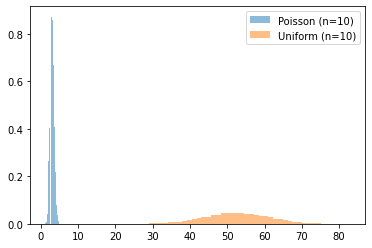

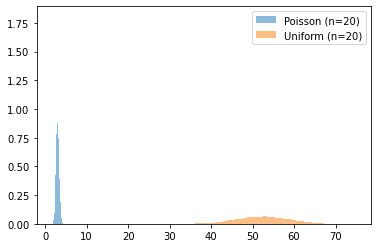

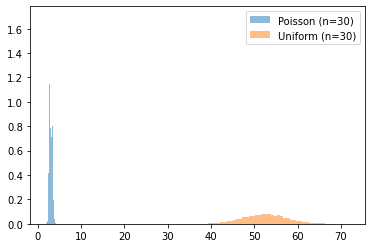

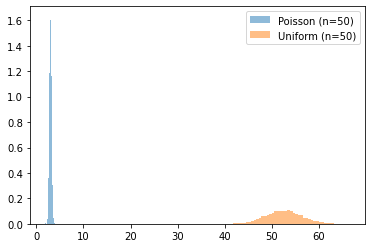

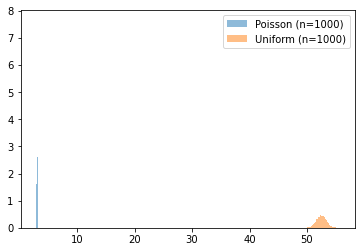

In [22]:
#5
for n in n_values:
    plt.hist(poisson_means[n], bins=50, density=True, alpha=0.5, label=f'Poisson (n={n})')
    plt.hist(uniform_means[n], bins=50, density=True, alpha=0.5, label=f'Uniform (n={n})')
    plt.legend()
    plt.show()

In [23]:
#6
poisson_pop_mean = poisson_population.mean()
uniform_pop_mean = uniform_population.mean()
for n in n_values:
    poisson_sample_mean = poisson_means[n].mean()
    uniform_sample_mean = uniform_means[n].mean()
    print(f'Pentru n={n}, media mediilor esantioanelor Poisson este {poisson_sample_mean} si se apropie de media populatiei {poisson_pop_mean}')
    print(f'Pentru n={n}, media mediilor esantioanelor Uniform este {uniform_sample_mean} si se apropie de media populatiei {uniform_pop_mean}')

Pentru n=10, media mediilor esantioanelor Poisson este 2.99988 si se apropie de media populatiei 3.0
Pentru n=10, media mediilor esantioanelor Uniform este 52.493772186671336 si se apropie de media populatiei 52.5
Pentru n=20, media mediilor esantioanelor Poisson este 3.0023400000000002 si se apropie de media populatiei 3.0
Pentru n=20, media mediilor esantioanelor Uniform este 52.45120535334765 si se apropie de media populatiei 52.5
Pentru n=30, media mediilor esantioanelor Poisson este 3.0012633333333336 si se apropie de media populatiei 3.0
Pentru n=30, media mediilor esantioanelor Uniform este 52.47000259180976 si se apropie de media populatiei 52.5
Pentru n=50, media mediilor esantioanelor Poisson este 2.99825 si se apropie de media populatiei 3.0
Pentru n=50, media mediilor esantioanelor Uniform este 52.50919202547269 si se apropie de media populatiei 52.5
Pentru n=1000, media mediilor esantioanelor Poisson este 2.9997568 si se apropie de media populatiei 3.0
Pentru n=1000, media

In [24]:
#7
sample_sizes = [10, 20, 30, 50, 1000]
for n in sample_sizes:
    samples = np.random.poisson(3, size=(n, 10000))
    sample_means = np.mean(samples, axis=1)
    mean_of_means = np.mean(sample_means)
    population_mean = 3
    sample_means_std = np.std(sample_means) 
    population_std = np.sqrt(3) 
    std_of_sample_means = population_std / np.sqrt(n) 
    print(f'Abaterea medie patratica a mediilor esantioanelor de marime {n} este: {sample_means_std}')
    print(f'Sigma\sqrt(n) este: {std_of_sample_means}')
    print('Diferenta dintre abaterea medie patratica a mediilor esantioanelor si sigma\sqrt(n) este:', sample_means_std - std_of_sample_means)

Abaterea medie patratica a mediilor esantioanelor de marime 10 este: 0.022012805364151133
Sigma\sqrt(n) este: 0.5477225575051661
Diferenta dintre abaterea medie patratica a mediilor esantioanelor si sigma\sqrt(n) este: -0.5257097521410149
Abaterea medie patratica a mediilor esantioanelor de marime 20 este: 0.02059678312261411
Sigma\sqrt(n) este: 0.38729833462074165
Diferenta dintre abaterea medie patratica a mediilor esantioanelor si sigma\sqrt(n) este: -0.36670155149812755
Abaterea medie patratica a mediilor esantioanelor de marime 30 este: 0.014710085731300872
Sigma\sqrt(n) este: 0.3162277660168379
Diferenta dintre abaterea medie patratica a mediilor esantioanelor si sigma\sqrt(n) este: -0.301517680285537
Abaterea medie patratica a mediilor esantioanelor de marime 50 este: 0.01660161389744982
Sigma\sqrt(n) este: 0.2449489742783178
Diferenta dintre abaterea medie patratica a mediilor esantioanelor si sigma\sqrt(n) este: -0.22834736038086798
Abaterea medie patratica a mediilor esantioa

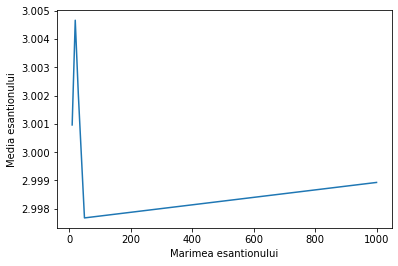

In [25]:
#8
import matplotlib.pyplot as plt
sample_sizes = [10, 20, 30, 50, 1000]
means = []
for n in sample_sizes:
    samples = np.random.poisson(3, size=(n, 10000))
    sample_means = np.mean(samples, axis=1)
    mean_of_means = np.mean(sample_means)
    means.append(mean_of_means)
plt.plot(sample_sizes, means)
plt.xlabel('Marimea esantionului')
plt.ylabel('Media esantionului')
plt.show()